In [2]:
%matplotlib inline
import sys
import torch
import pandas as pd
import matplotlib.pyplot as plt

from model.training.rollout_data import RolloutDataset as Buffer
from utils.pytorch_utils import DEVICE
import seaborn as sns


print(f"python {sys.version}")
print(f"torch {torch.__version__}")
print(f"device = {DEVICE}")


python 3.10.13 (main, Sep 11 2023, 08:16:02) [Clang 14.0.6 ]
torch 2.2.1
device = mps


In [8]:
ls logs/atari_2024-06-05/

batch_0.monitor.csv              ppo_Pong-v5_batch_0.monitor.csv
monitor.csv


In [9]:
# with open('logs/atari_2024-06-12/')
ppo_pong = pd.read_csv('logs/atari_2024-06-05/ppo_Pong-v5_batch_0.monitor.csv', header=1)
vi_pong = pd.read_csv('logs/atari_2024-06-12/cnn_vae_Pong-v5_batch_0.monitor.csv', header=1)


In [10]:
# import pickle
# with open('simulations/cnn_vae_atari_Pong-v5_2024-06-04_batched_data.pkl', 'rb') as f:
#     cnnvae_pong = pickle.load(f)

# with open('simulations/ppo_atari_Pong-v5_2024-06-04_batched_data.pkl', 'rb') as f:
#     ppo_pong = pickle.load(f)


/Users/nicholasfranklin/miniconda3/envs/state_inference/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nicholasfranklin/miniconda3/envs/state_inference/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nicholasfranklin/miniconda3/envs/state_inference/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nicholasfranklin/miniconda3/envs/state_inference/lib/python3.10/site-packag

<Axes: xlabel='num_timesteps', ylabel='cumulative_reward'>

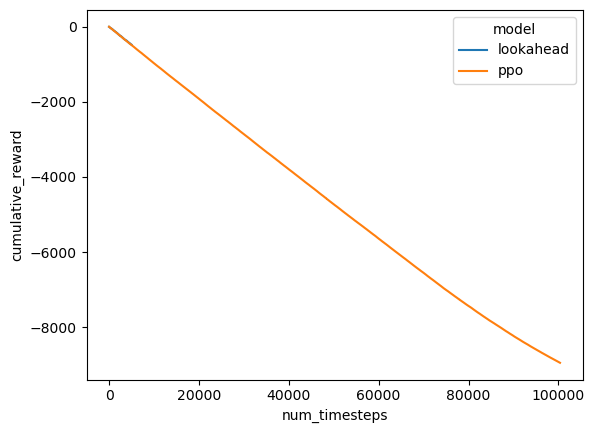

In [12]:
metric = 'average_reward'
metric_fn = lambda x: x.rolling(100).mean()

reward_df = []
for ii, data in enumerate(vi_pong):
    _rew = pd.DataFrame(data['rewards'])
    _rew['batch'] = ii
    _rew[metric] = metric_fn(_rew['rewards'])
    _rew['model'] = 'lookahead'
    reward_df.append(_rew)

for ii, data in enumerate(ppo_pong):
    _rew = pd.DataFrame(data['rewards'])
    _rew['batch'] = ii
    _rew[metric] = metric_fn(_rew['rewards'])
    _rew['model'] = 'ppo'
    reward_df.append(_rew)

# for ii, data in enumerate(lookahead_batched_data):
#     _rew = pd.DataFrame(data['rewards'])
#     _rew['batch'] = ii
#     _rew['cumulative_reward'] = _rew['rewards'].cumsum()
#     _rew['model'] = 'vi-lookahead'
#     reward_df.append(_rew)




reward_df = []
def proc_df(df, metric, metric_fn, name):
    df['batch'] = df.index
    df[metric] = metric_fn(df['rewards'])
    return df
for ii, data in enumerate(ppo_batch_data):
    _rew = pd.DataFrame(data['rewards'])
    _rew['batch'] = ii
    _rew[metric] = metric_fn(_rew['rewards'])
    _rew['model'] = 'ppo'
    reward_df.append(_rew)

for ii, data in enumerate(cnnvae_batch_data):
    _rew = pd.DataFrame(data['rewards'])
    _rew['batch'] = ii
    _rew[metric] = metric_fn(_rew['rewards'])
    _rew['model'] = 'vi'
    reward_df.append(_rew)


sns.lineplot(data=reward_df.dropna(), x='num_timesteps', y=metric, hue='model', errorbar=None)

reward_df = pd.concat(reward_df)
sns.lineplot(data=reward_df, x='num_timesteps', y='cumulative_reward', hue='model', errorbar=None)
